In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy import signal
from scipy import constants
import math
import scipy.io as sio
from scipy.signal import windows

Zadatak 1

In [2]:
def diskretni_chirp(T,W,p):
    Fs=p*W
    t=np.arange(-T/2, T/2, 1/Fs)
    x=np.exp(1j*np.pi*W*(t**2)/T)
    return x

Zadatak 2

Text(0.5, 0, '$t$[s]')

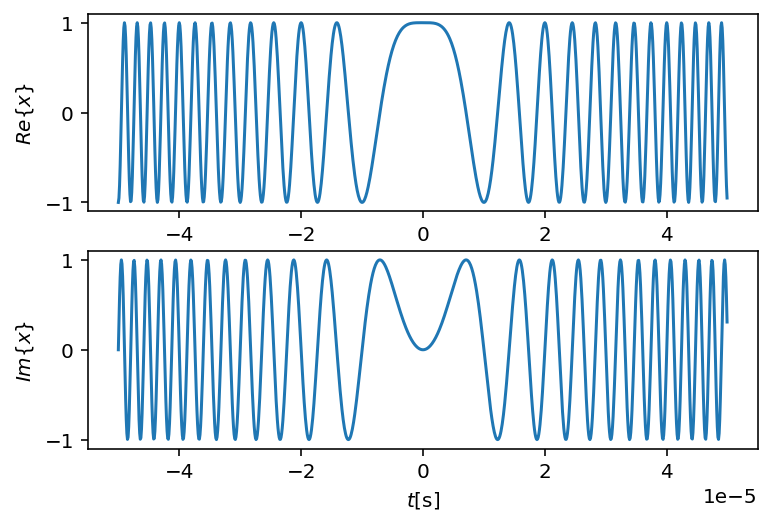

In [3]:
W=10**6
T=100*(10**-6)
p=10

x=diskretni_chirp(T,W,p)
t=np.arange(-T/2, T/2, 1/(p*W))

plt.figure()
plt.subplot(211)
plt.plot(t, x.real)
plt.ylabel('$Re\{x\}$')
plt.subplot(212)
plt.plot(t,x.imag)
plt.ylabel('$Im\{x\}$')
plt.xlabel('$t$[s]')

Zadatak 3

In [4]:
T=100*(10**-6)
W1=100*(10**3)
W2=1*(10**6)
W3=10*(10**6)
p=1.2

x1=diskretni_chirp(T,W1,p)
x2=diskretni_chirp(T,W2,p)
x3=diskretni_chirp(T,W3,p)



Zadatak 4

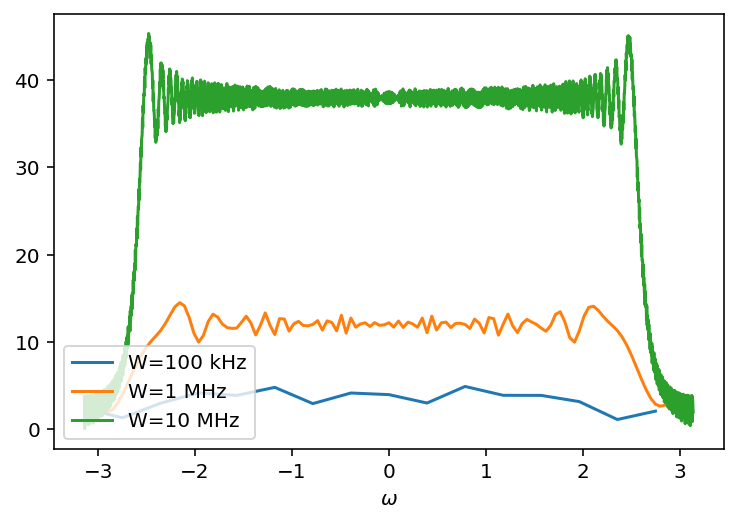

In [5]:
N1=np.int(2**(np.ceil(np.log2(len(x1)))))
N2=np.int(2**(np.ceil(np.log2(len(x2)))))
N3=np.int(2**(np.ceil(np.log2(len(x3)))))

X1=fftpack.fft(x1,N1)
X2=fftpack.fft(x2,N2)
X3=fftpack.fft(x3,N3)

X1=fftpack.fftshift(X1)
X2=fftpack.fftshift(X2)
X3=fftpack.fftshift(X3)

k1=np.arange(-N1/2, N1/2, dtype=int)
k2=np.arange(-N2/2, N2/2, dtype=int)
k3=np.arange(-N3/2, N3/2, dtype=int)

wk1=2*np.pi*k1/N1
wk2=2*np.pi*k2/N2
wk3=2*np.pi*k3/N3

plt.figure()
plt.plot(wk1, np.abs(X1), label="W=100 kHz")
plt.plot(wk2,np.abs(X2), label="W=1 MHz")
plt.plot(wk3,np.abs(X3), label="W=10 MHz")
plt.xlabel(r'$\omega$')
plt.legend(loc='lower left')

Zadatak 5

Text(0.5, 0, '$t$[s]')

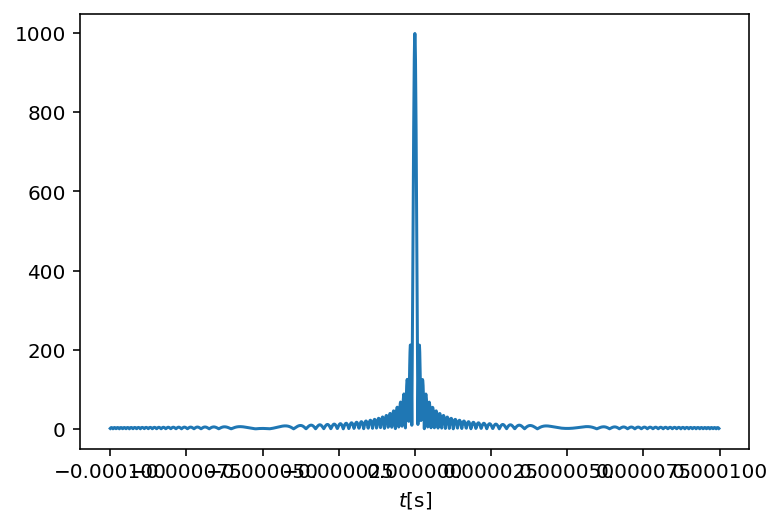

In [10]:
T=100*(10**-6)
W=1*(10**6)
p=10

x=diskretni_chirp(T,W,p)
h=np.conjugate(x)

y=signal.fftconvolve(h,x)
t=np.arange(-T,T,1/(W*p))
t=t[0:len(y)] #uskladjivanje duzine zbog crtanja, gubi se samo poslednji odmerak

plt.figure()
plt.plot(t,np.abs(y))
plt.xlabel('$t$[s]')

Zadatak 6

-14.55636311647675


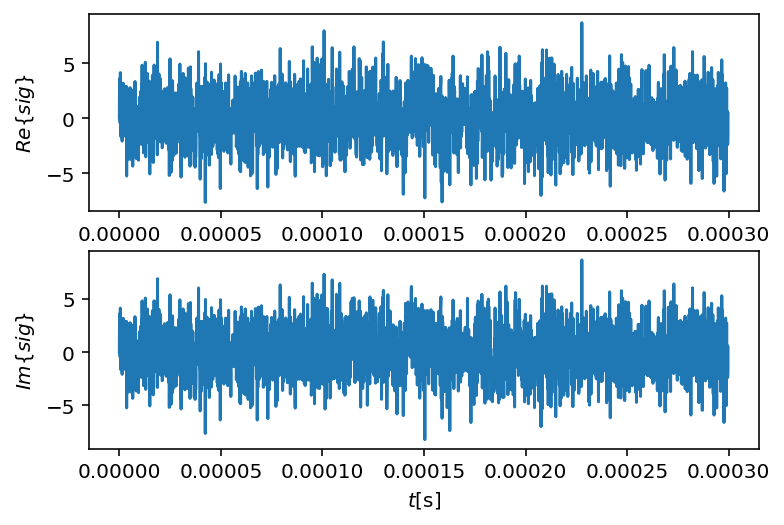

In [12]:
T=300*(10**-6)
L=int((100*(10**-6))*W*p)

sig=np.zeros(L)


sig=np.concatenate((sig,x,sig))

t=np.arange(0,T,1/(W*p))
t=t[0:len(sig)]

sigma=math.sqrt(5)
v=np.random.normal(0,sigma,len(sig))
v=v+1j*v
sig+=v

plt.figure()
plt.subplot(211)
plt.plot(t, sig.real)
plt.ylabel('$Re\{sig\}$')
plt.subplot(212)
plt.plot(t,sig.imag)
plt.ylabel('$Im\{sig\}$')
plt.xlabel('$t$[s]')

Ps=np.sum(np.abs(x)**2)
Pn=np.sum(np.abs(v)**2)
SNR=10*np.log10(Ps/Pn)
print(SNR)

Zadatak 7

Text(0.5, 0, '$Rastojanje$[m]')

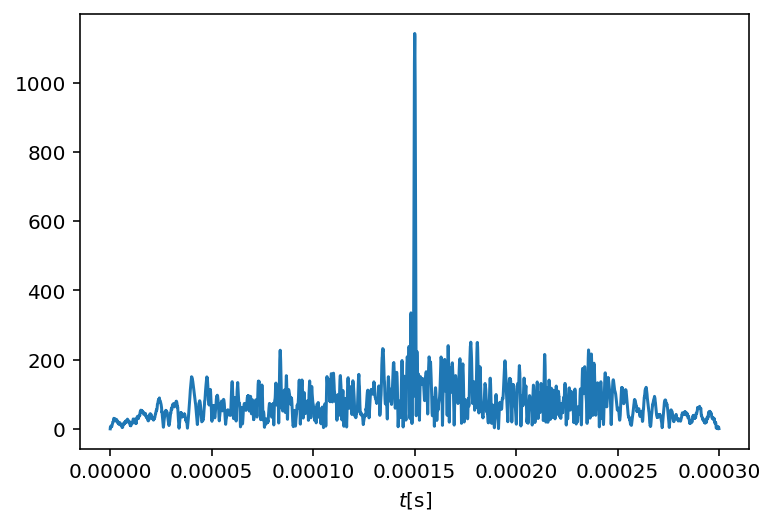

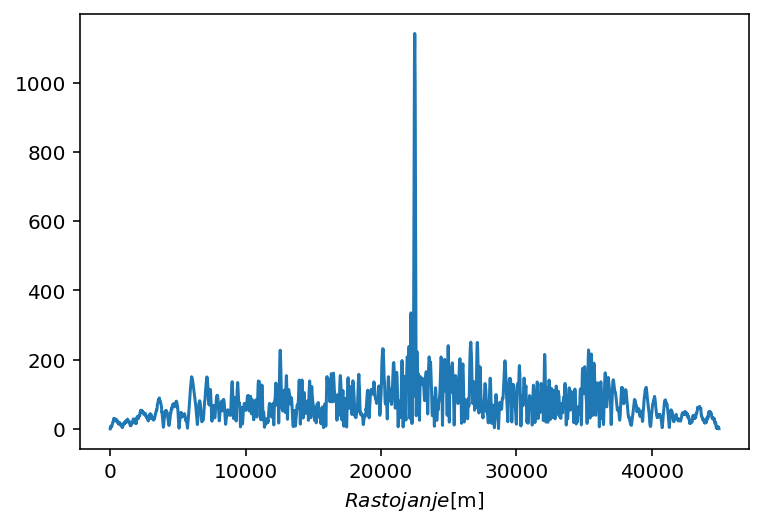

In [13]:
y=signal.fftconvolve(h,sig)

t=np.arange(0,T, T/len(y))

plt.figure()
plt.plot(t,np.abs(y))
plt.xlabel('$t$[s]')

Rmax=(1/2)*constants.c*T
R=np.arange(0,Rmax, Rmax/len(y))

plt.figure()
plt.plot(R,np.abs(y))
plt.xlabel('$Rastojanje$[m]')


Zadatak 8

In [14]:
def chirp_povorka(T,W,p,PRF,Np):
    if(Np<=0):
        print("Broj impulsa mora biti veci od 0.")
        return 0
    T0=1/PRF
    if(T0<T):
        print("Dolazi do preklapanja impulsa.")
        return 0
    Fs=p*W
    z=0*np.arange(0,(T0-T),1/Fs)
    y=diskretni_chirp(T,W,p)
    x=y
    for i in range(1,Np):
        x=np.concatenate((x,z,y))
    return x

Zadatak 9

Text(0.5, 0, '$\\omega$')

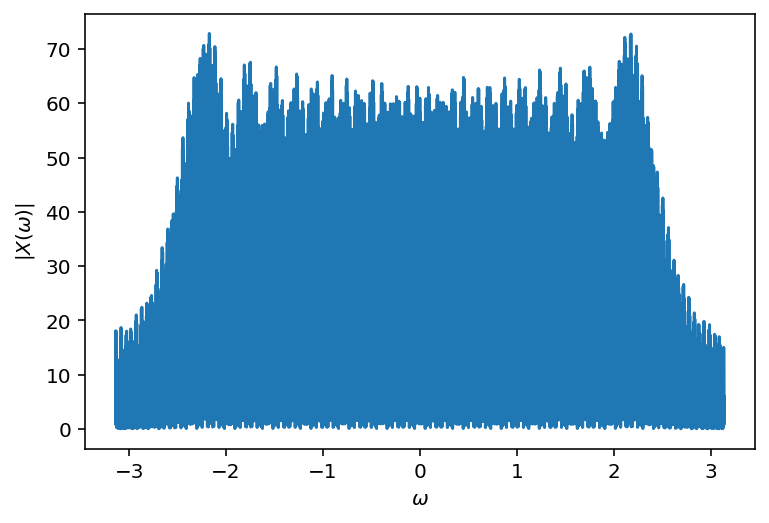

In [15]:
T=10*(10**-6)
W=10*(10**6)
PRF=10*(10**3)
p=1.2

Np=5
x=chirp_povorka(T,W,p,PRF,Np)


N=np.int(2**(np.ceil(np.log2(len(x)))))
X=fftpack.fft(x,N)
X=fftpack.fftshift(X)
k=np.arange(-N/2,N/2,dtype=int)
wk=2*np.pi*k/N

plt.figure()
plt.plot(wk,np.abs(X))
plt.ylabel(r'$\|X(\omega)|$')
plt.xlabel(r'$\omega$')

Zadatak 10

Text(0.5, 0, '$\\omega$')

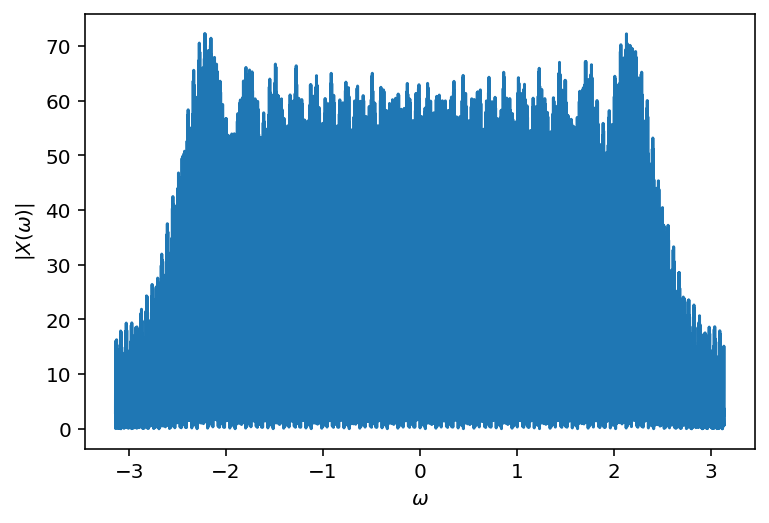

In [16]:
Wd=2*np.pi/5000

n=np.arange(len(x))
exp=np.exp(1j*Wd*n)
x*=exp

X=fftpack.fft(x,N)
X=fftpack.fftshift(X)
k=np.arange(-N/2,N/2, dtype=int)

wk=2*np.pi*k/N

plt.figure()
plt.plot(wk,np.abs(X))
plt.ylabel(r'$\|X(\omega)|$')
plt.xlabel(r'$\omega$')

Zadatak 11

Text(0.5, 0, '$\\omega$')

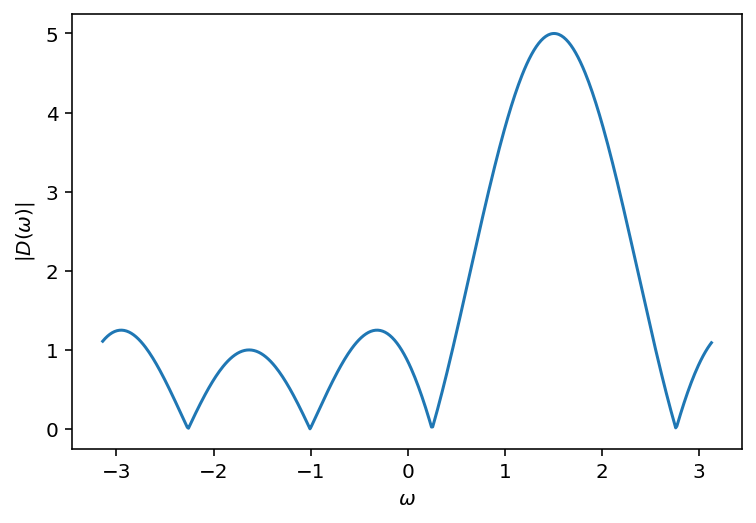

In [18]:
L=round((p*W)/PRF)     #period ponavljanja u odmercima

d=(np.zeros(int(len(x)/L)+1))*(1+1j)
for i in range(Np):
    d[i]=x[i*L]

N=512

D=fftpack.fft(d,N)
D=fftpack.fftshift(D)
k=np.arange(-N/2,N/2,dtype=int)
wk=2*np.pi*k/N

plt.figure()
plt.plot(wk,np.abs(D))
plt.ylabel(r'$\|D(\omega)|$')
plt.xlabel(r'$\omega$')

Zadatak 12

Text(0.5, 0, '$\\omega$')

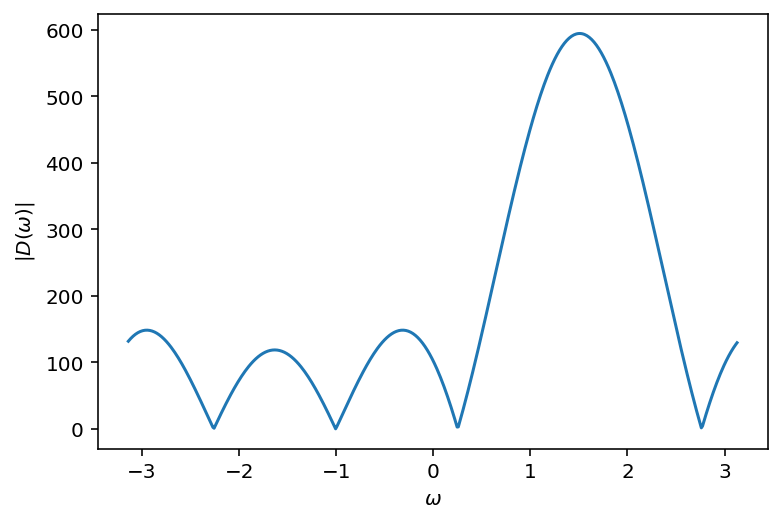

In [19]:
h=diskretni_chirp(T,W,p)
h=np.conjugate(h)           #odgovarajuci uskladjeni filtar
y=signal.fftconvolve(h,x)   #filtrirana povorka impulsa


k=0
while(np.abs(y[k])<50):     #trazenje pika
    k+=1

d=(np.zeros(int(len(y)/L)+1))*(1+1j)
for i in range(Np):
    d[i]=y[i*L+k]


N=512
D=fftpack.fft(d,N)
D=fftpack.fftshift(D)
k=np.arange(-N/2,N/2,dtype=int)
wk=2*np.pi*k/N

plt.figure()
plt.plot(wk,np.abs(D))
plt.ylabel(r'$\|D(\omega)|$')
plt.xlabel(r'$\omega$')

 Ucitavanje fajla "radar_011"

In [20]:
mat_contents = sio.loadmat('radar_011')
matrix=mat_contents['y']
s=mat_contents['s']
T=mat_contents['T']
W=mat_contents['W']
fs=mat_contents['fs']
PRF=mat_contents['PRF']
fc=mat_contents['fc']
T_out=mat_contents['T_out']

T_out=np.concatenate((T_out))
s=np.concatenate((s))              #pretvaranje s u np array

Filtriranje primljenih impulsa uskladjenim filtrom u frekvencijskom domenu

In [22]:
h=np.conjugate(s)
length=len(h)+len(matrix[:,0])-1        #duzina konvolucije

y=np.zeros((20,length))*(1+1j)
for i in range(20):
    y[i]=signal.fftconvolve(h,matrix[:, i])

Formiranje novih signala sa počecima u svakom odmjerku prvog primljenog, odnosno, filtriranog impulsa

In [23]:
signals=y.transpose()

Formiranje matrice odmeraka DTFT svakog od ovih signala

In [25]:
N=1024
SIGNALS=np.zeros((length,N))

for i in range(length):
    signals[i]*=windows.hamming(len(signals[i]))
    SIGNALS[i]=fftpack.fft(signals[i],N)
    SIGNALS[i]=fftpack.fftshift(SIGNALS[i])

/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


Graficki prikaz dobijene matrice